In [332]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [187]:
bike_df = pd.read_csv('day.csv')
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data inspection

In [188]:
bike_df.shape

(730, 16)

In [189]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [190]:
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [191]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [192]:
# converting column 'dteday' object datatype to datetime

bike_df['dteday'] = pd.to_datetime(bike_df['dteday'],format='%d-%m-%Y')

In [193]:
bike_df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [194]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [185]:
#bike_df['Day_of_week'] = bike_df['dteday'].dt.dayofweek

In [195]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data cleaning / preparation /  outlier checks

<Axes: ylabel='cnt'>

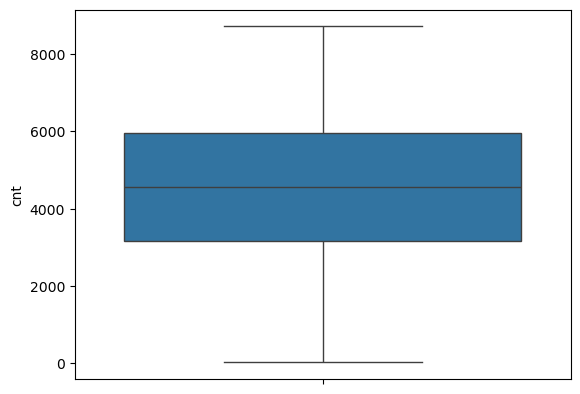

In [196]:
sns.boxplot(bike_df['cnt'])

In [197]:
bike_df['cnt'].describe()

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

In [198]:
# mapping season values
season_dict = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bike_df['Season'] = bike_df['season'].map(season_dict)

In [199]:
# mapping weathersit values
weathersit_dict = {1:'Clear/PartlyCloudy',2:'Mist/Cloudy',3:'Snow/Rain',4:'Heavy Rain/Thunderstorm'}
bike_df['WeatherSit'] = bike_df['weathersit'].map(weathersit_dict)

In [200]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Season,WeatherSit
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,spring,Mist/Cloudy
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,spring,Mist/Cloudy
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,spring,Clear/PartlyCloudy
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,spring,Clear/PartlyCloudy
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,spring,Clear/PartlyCloudy


In [201]:
# creating dummy variables for Season
Season_dummy = pd.get_dummies(bike_df['Season'],drop_first=True)
Season_dummy = Season_dummy.astype(int)
Season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [202]:
# concating the dummy dataframe with the original dataframe
bike_df = pd.concat([bike_df,Season_dummy],axis=1)
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,Season,WeatherSit,spring,summer,winter
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,...,80.5833,10.749882,331,654,985,spring,Mist/Cloudy,1,0,0
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,...,69.6087,16.652113,131,670,801,spring,Mist/Cloudy,1,0,0
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,...,43.7273,16.636703,120,1229,1349,spring,Clear/PartlyCloudy,1,0,0
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,...,59.0435,10.739832,108,1454,1562,spring,Clear/PartlyCloudy,1,0,0
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,...,43.6957,12.522300,82,1518,1600,spring,Clear/PartlyCloudy,1,0,0


In [203]:
# creating dummy variables for weathersit
WeatherSit_dummy = pd.get_dummies(bike_df['WeatherSit'],drop_first=True)
WeatherSit_dummy = WeatherSit_dummy.astype(int)
WeatherSit_dummy.head()

,Mist/Cloudy,Snow/Rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [204]:
bike_df = pd.concat([bike_df,WeatherSit_dummy],axis=1)
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,casual,registered,cnt,Season,WeatherSit,spring,summer,winter,Mist/Cloudy,Snow/Rain
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,...,331,654,985,spring,Mist/Cloudy,1,0,0,1,0
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,...,131,670,801,spring,Mist/Cloudy,1,0,0,1,0
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,...,120,1229,1349,spring,Clear/PartlyCloudy,1,0,0,0,0
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,...,108,1454,1562,spring,Clear/PartlyCloudy,1,0,0,0,0
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,...,82,1518,1600,spring,Clear/PartlyCloudy,1,0,0,0,0


In [205]:
# mapping weekday column with weekday name
weekday_dict = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
bike_df['Weekday'] = df['weekday'].map(weekday_dict)

In [206]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,registered,cnt,Season,WeatherSit,spring,summer,winter,Mist/Cloudy,Snow/Rain,Weekday
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,...,654,985,spring,Mist/Cloudy,1,0,0,1,0,Sunday
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,...,670,801,spring,Mist/Cloudy,1,0,0,1,0,Monday
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,...,1229,1349,spring,Clear/PartlyCloudy,1,0,0,0,0,Tuesday
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,...,1454,1562,spring,Clear/PartlyCloudy,1,0,0,0,0,Wednesday
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,...,1518,1600,spring,Clear/PartlyCloudy,1,0,0,0,0,Thursday


## Exploratory data analysis

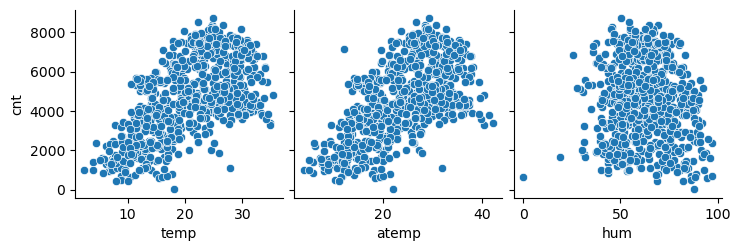

In [207]:
# 
sns.pairplot(data=bike_df,x_vars=['temp','atemp','hum'],y_vars='cnt')

<Axes: xlabel='Season', ylabel='cnt'>

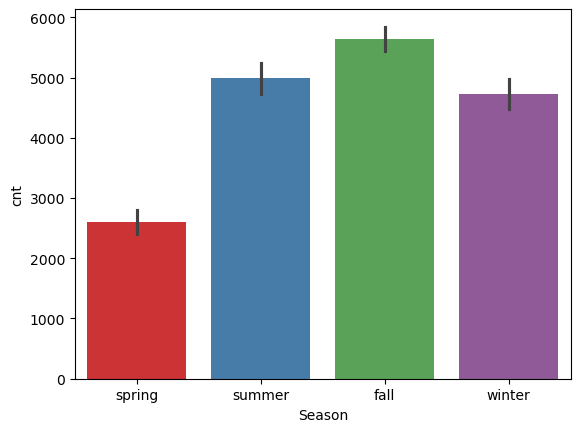

In [208]:
sns.barplot(data=bike_df,x='Season',y='cnt',palette='Set1',hue='Season',legend=False)
# fall season is clear winner here when bike usage increases!!!

<Axes: xlabel='WeatherSit', ylabel='cnt'>

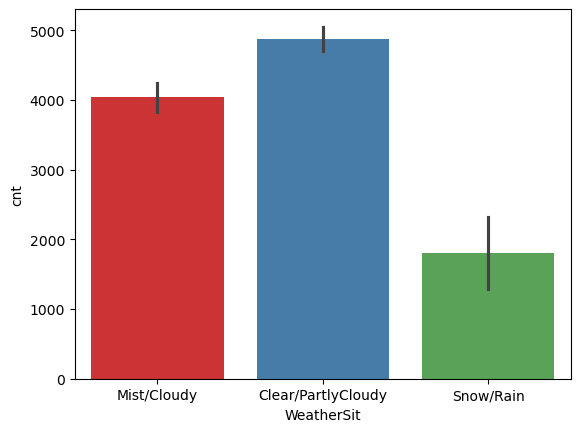

In [209]:
sns.barplot(data=bike_df,x='WeatherSit',y='cnt',palette='Set1',hue='WeatherSit',legend=False)

# During clear wheather conditions (1: Clear, Few clouds, Partly cloudy, Partly cloudy) bike usage is more
# During Snow/Rain (3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) bike rental usage decreases.

<Axes: xlabel='Weekday', ylabel='cnt'>

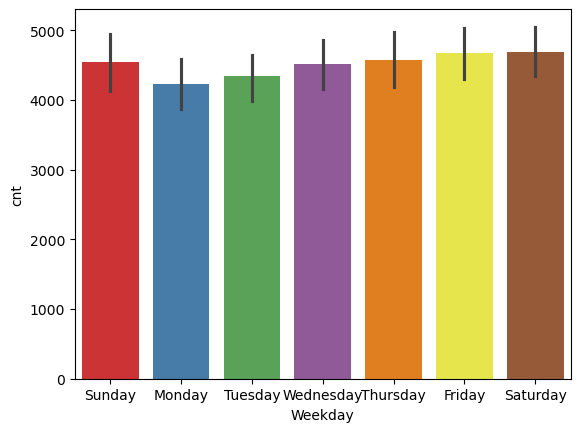

In [210]:
sns.barplot(data=bike_df,x='Weekday',y='cnt',palette='Set1',hue='Weekday',legend=False)

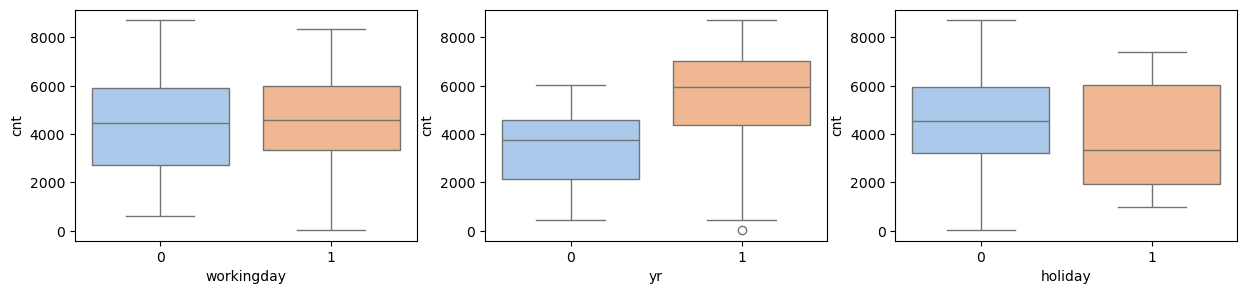

In [211]:
# visualising categorical variables - workingday and yr

fig,axes = plt.subplots(1, 3, figsize=(15,3))

sns.boxplot(ax=axes[0], data=bike_df, x='workingday', y='cnt',palette='pastel',hue='workingday')
sns.boxplot(ax=axes[1], data=bike_df, x='yr', y='cnt',palette='pastel',hue='yr')
sns.boxplot(ax=axes[2], data=bike_df, x='holiday', y='cnt',palette='pastel',hue='holiday')

axes[0].legend_.remove()
axes[1].legend_.remove()
axes[2].legend_.remove()

plt.show()

# The median for both working and non-working day is close!!!
# The median for year-2019 is more as compared to year-2018 for usage of rental bikes which means there is increase in usage compared to previoius year!!!
# On holiday's bike usage of rental bikes reduces!!!

<Axes: >

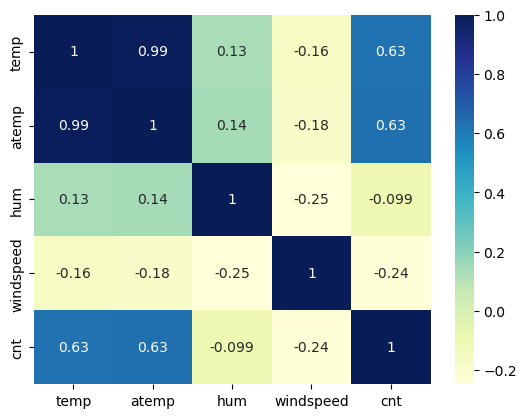

In [212]:
bike_df_corr = bike_df[['temp','atemp','hum','windspeed','cnt']]
sns.heatmap(bike_df_corr.corr(),annot=True,cmap='YlGnBu')

In [213]:
# dropping columns - casual and registered

bike_df.drop(columns=['casual','registered'],axis=1,inplace=True)

In [214]:
#bike_df.head()
bike_df.shape

(730, 22)

In [219]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'Season', 'WeatherSit', 'spring', 'summer', 'winter', 'Mist/Cloudy',
       'Snow/Rain', 'Weekday'],
      dtype='object')

## Checking the fit of the model without train and test

In [166]:
X = bike_df[['temp','atemp','hum','windspeed']]
y = bike_df['cnt']
X = sm.add_constant(X)

In [169]:
lr = sm.OLS(y,X)
lr_model = lr.fit()
#lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     156.2
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           2.26e-96
Time:                        12:20:06   Log-Likelihood:                -6333.3
No. Observations:                 730   AIC:                         1.268e+04
Df Residuals:                     725   BIC:                         1.270e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3855.5045    355.506     10.845      0.000    3157.561    4553.448
temp          50.9104     55.679      0.914      0.361     -58.401     160.221
atemp        103.1366     51.552      2.001      0.046       1.928     204.345
hum          -31.3331      3.845     -8.149      0.000     -38.882     -23.784
windspeed    -67.5656     10.765     -6.277      0.000     -88.699     -46.432
==============================================================================
Omnibus:                        7.840   Durbin-Watson:                   0.407
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                6.112
Skew:                           0.123   Prob(JB):                       0.0471
Kurtosis:                       2.626   Cond. No.                         491.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# R-squared is 46% which is not high
# p-value for temp is more than 0.05 which means its INSIGNIFICANT IN NATURE!!

In [221]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'Season', 'WeatherSit', 'spring', 'summer', 'winter', 'Mist/Cloudy',
       'Snow/Rain', 'Weekday'],
      dtype='object')

## Splitting into train and test

In [293]:
# taking only numerical values
model_cols = ['yr','mnth','weekday','temp', 'atemp', 'hum', 'windspeed','spring', 'summer', 'winter', 'Mist/Cloudy','Snow/Rain','cnt']
bike_df_model = bike_df[model_cols]
bike_df_model.head()



,yr,mnth,weekday,temp,atemp,hum,windspeed,spring,summer,winter,Mist/Cloudy,Snow/Rain,cnt
0,0,1,6,14.110847,18.18125,80.5833,10.749882,1,0,0,1,0,985
1,0,1,0,14.902598,17.68695,69.6087,16.652113,1,0,0,1,0,801
2,0,1,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,0,1349
3,0,1,2,8.200000,10.60610,59.0435,10.739832,1,0,0,0,0,1562
4,0,1,3,9.305237,11.46350,43.6957,12.522300,1,0,0,0,0,1600


In [294]:
bike_df_train,bike_df_test = train_test_split(bike_df_model,train_size=0.7,random_state=100)
print(bike_df_train.shape)
print(bike_df_test.shape)

(510, 13)
(220, 13)


In [295]:
# scaling columns - temp, atemp, hum, windspeed,cnt
scaler = MinMaxScaler()
bike_df_num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_df_train[bike_df_num_vars] = scaler.fit_transform(bike_df_train[bike_df_num_vars])
bike_df_train.head()

,yr,mnth,weekday,temp,atemp,hum,windspeed,spring,summer,winter,Mist/Cloudy,Snow/Rain,cnt
576,1,7,2,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0.827658
426,1,3,6,0.442393,0.438975,0.640189,0.255342,1,0,0,1,0,0.465255
728,1,12,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0.204096
482,1,4,6,0.395666,0.391735,0.504508,0.188475,0,1,0,1,0,0.482973
111,0,4,5,0.345824,0.318819,0.751824,0.380981,0,1,0,1,0,0.191095


<Axes: >

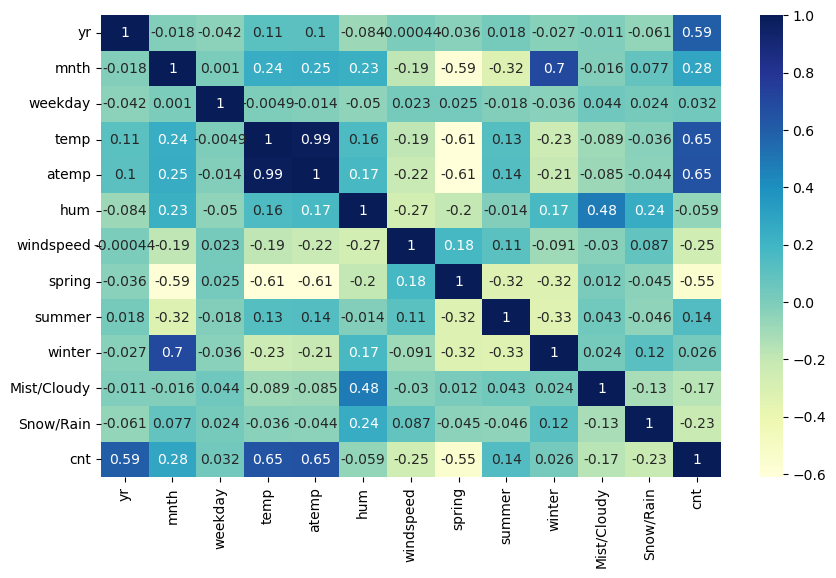

In [296]:
#bike_df_train_corr = bike_df_train[['temp','atemp','hum','windspeed','cnt']]
plt.figure(figsize=(10, 6))
sns.heatmap(bike_df_train.corr(),annot=True,cmap='YlGnBu')

## Training the model

In [298]:
# X_train, y_train

y_train = bike_df_train['cnt']
X_train = bike_df_train[['yr','mnth','weekday','temp', 'atemp', 'hum', 'windspeed','spring', 'summer', 'winter', 'Mist/Cloudy','Snow/Rain']]

In [299]:
X_train_sm = sm.add_constant(X_train['temp'])

# First model
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [300]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           2.46e-61
Time:                        20:32:58   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [272]:
# About 41% of variance in count is explained by the variable temp
# p-value is also 0

In [301]:
# add weekday

X_train_sm = X_train[['temp','weekday']]
X_train_sm = sm.add_constant(X_train_sm)

# Second model
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const      0.157094
temp       0.641118
weekday    0.003961
dtype: float64

In [302]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           3.39e-60
Time:                        20:33:10   Log-Likelihood:                 176.65
No. Observations:                 510   AIC:                            -347.3
Df Residuals:                     507   BIC:                            -334.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1571      0.023      6.924      0.000       0.113       0.202
temp           0.6411      0.034     19.033      0.000       0.575       0.707
weekday        0.0040      0.004      1.050      0.294      -0.003       0.011
==============================================================================
Omnibus:                        7.001   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                4.693
Skew:                           0.067   Prob(JB):                       0.0957
Kurtosis:                       2.550   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
# Build model with all the variables in bike_df_train

y_train = bike_df_train['cnt']
X_train = bike_df_train[['yr','mnth','weekday','temp', 'atemp', 'hum', 'windspeed','spring', 'summer', 'winter', 'Mist/Cloudy','Snow/Rain']]
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const          0.250804
yr             0.232934
mnth           0.000967
weekday        0.008511
temp           0.420654
atemp          0.078823
hum           -0.129137
windspeed     -0.181185
spring        -0.072824
summer         0.047027
winter         0.081992
Mist/Cloudy   -0.054556
Snow/Rain     -0.241354
dtype: float64

In [305]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          7.28e-182
Time:                        20:33:52   Log-Likelihood:                 489.39
No. Observations:                 510   AIC:                            -952.8
Df Residuals:                     497   BIC:                            -897.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2508      0.039      6.393      0.000       0.174       0.328
yr              0.2329      0.008     27.507      0.000       0.216       0.250
mnth            0.0010      0.002      0.409      0.683      -0.004       0.006
weekday         0.0085      0.002      4.079      0.000       0.004       0.013
temp            0.4207      0.140      3.000      0.003       0.145       0.696
atemp           0.0788      0.143      0.550      0.582      -0.203       0.360
hum            -0.1291      0.039     -3.280      0.001      -0.206      -0.052
windspeed      -0.1812      0.027     -6.638      0.000      -0.235      -0.128
spring         -0.0728      0.023     -3.127      0.002      -0.119      -0.027
summer          0.0470      0.016      2.978      0.003       0.016       0.078
winter          0.0820      0.019      4.348      0.000       0.045       0.119
Mist/Cloudy    -0.0546      0.011     -4.972      0.000      -0.076      -0.033
Snow/Rain      -0.2414      0.028     -8.763      0.000      -0.295      -0.187
==============================================================================
Omnibus:                       90.121   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.132
Skew:                          -0.873   Prob(JB):                     1.18e-52
Kurtosis:                       5.864   Cond. No.                         385.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# p-values of mnth,atemp are more that 0.05

In [307]:
# calculating VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,temp,378.57
4,atemp,366.03
5,hum,30.53
1,mnth,15.29
6,windspeed,5.05
9,winter,4.71
7,spring,4.25
2,weekday,3.15
8,summer,2.63
10,Mist/Cloudy,2.32


In [308]:
# since here column - atemp has got high p value and a high VIF , will be dropping this variable.

In [309]:
X = X_train.drop('atemp',axis=1)

In [310]:
# create another model without the atemp variable.

y_train = bike_df_train['cnt']
X_train = X
#X_train = bike_df_train[['yr','mnth','weekday','temp', 'atemp', 'hum', 'windspeed','spring', 'summer', 'winter', 'Mist/Cloudy','Snow/Rain']]
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const          0.250526
yr             0.232850
mnth           0.000971
weekday        0.008456
temp           0.495429
hum           -0.128215
windspeed     -0.184092
spring        -0.071473
summer         0.048522
winter         0.083719
Mist/Cloudy   -0.054685
Snow/Rain     -0.242306
dtype: float64

In [312]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.5
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          5.58e-183
Time:                        21:26:09   Log-Likelihood:                 489.23
No. Observations:                 510   AIC:                            -954.5
Df Residuals:                     498   BIC:                            -903.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2505      0.039      6.391      0.000       0.174       0.328
yr              0.2329      0.008     27.521      0.000       0.216       0.249
mnth            0.0010      0.002      0.411      0.682      -0.004       0.006
weekday         0.0085      0.002      4.060      0.000       0.004       0.013
temp            0.4954      0.034     14.365      0.000       0.428       0.563
hum            -0.1282      0.039     -3.262      0.001      -0.205      -0.051
windspeed      -0.1841      0.027     -6.879      0.000      -0.237      -0.132
spring         -0.0715      0.023     -3.089      0.002      -0.117      -0.026
summer          0.0485      0.016      3.121      0.002       0.018       0.079
winter          0.0837      0.019      4.506      0.000       0.047       0.120
Mist/Cloudy    -0.0547      0.011     -4.988      0.000      -0.076      -0.033
Snow/Rain      -0.2423      0.027     -8.821      0.000      -0.296      -0.188
==============================================================================
Omnibus:                       88.405   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.594
Skew:                          -0.857   Prob(JB):                     1.14e-51
Kurtosis:                       5.847   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [313]:
# calculating VIF again - 2nd iteration
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
4,hum,30.48
3,temp,16.89
1,mnth,15.29
5,windspeed,4.82
8,winter,4.57
6,spring,4.18
2,weekday,3.14
7,summer,2.54
9,Mist/Cloudy,2.32
0,yr,2.08


In [ ]:
# Now will be removing variable mnth as it has high p value and comparably low VIF when compared with hum and temp.

In [314]:
X = X_train.drop('mnth',axis=1)

In [315]:
# create another model without the mnth variable.

y_train = bike_df_train['cnt']
X_train = X
#X_train = bike_df_train[['yr','mnth','weekday','temp', 'atemp', 'hum', 'windspeed','spring', 'summer', 'winter', 'Mist/Cloudy','Snow/Rain']]
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const          0.256520
yr             0.232713
weekday        0.008502
temp           0.496016
hum           -0.126697
windspeed     -0.183827
spring        -0.075765
summer         0.045616
winter         0.086846
Mist/Cloudy   -0.054942
Snow/Rain     -0.242973
dtype: float64

In [316]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.8
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          3.80e-184
Time:                        22:00:22   Log-Likelihood:                 489.14
No. Observations:                 510   AIC:                            -956.3
Df Residuals:                     499   BIC:                            -909.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2565      0.036      7.057      0.000       0.185       0.328
yr              0.2327      0.008     27.549      0.000       0.216       0.249
weekday         0.0085      0.002      4.091      0.000       0.004       0.013
temp            0.4960      0.034     14.406      0.000       0.428       0.564
hum            -0.1267      0.039     -3.241      0.001      -0.204      -0.050
windspeed      -0.1838      0.027     -6.877      0.000      -0.236      -0.131
spring         -0.0758      0.021     -3.673      0.000      -0.116      -0.035
summer          0.0456      0.014      3.298      0.001       0.018       0.073
winter          0.0868      0.017      5.129      0.000       0.054       0.120
Mist/Cloudy    -0.0549      0.011     -5.024      0.000      -0.076      -0.033
Snow/Rain      -0.2430      0.027     -8.869      0.000      -0.297      -0.189
==============================================================================
Omnibus:                       88.356   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.154
Skew:                          -0.855   Prob(JB):                     8.65e-52
Kurtosis:                       5.853   Cond. No.                         47.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [317]:
# calculating VIF again - 3rd iteration
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,hum,27.01
2,temp,15.35
4,windspeed,4.68
5,spring,3.82
1,weekday,3.08
7,winter,3.07
8,Mist/Cloudy,2.28
6,summer,2.26
0,yr,2.08
9,Snow/Rain,1.23


In [ ]:
# Now removing variable hum , since it has high VIF but low p value

In [318]:
X = X_train.drop('hum',axis=1)

In [319]:
# create another model without the hum variable.

y_train = bike_df_train['cnt']
X_train = X
#X_train = bike_df_train[['yr','mnth','weekday','temp', 'atemp', 'hum', 'windspeed','spring', 'summer', 'winter', 'Mist/Cloudy','Snow/Rain']]
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const          0.190446
yr             0.235874
weekday        0.009153
temp           0.469304
windspeed     -0.158445
spring        -0.082756
summer         0.041308
winter         0.075713
Mist/Cloudy   -0.075604
Snow/Rain     -0.278217
dtype: float64

In [320]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.5
Date:                Sun, 29 Dec 2024   Prob (F-statistic):          4.05e-183
Time:                        22:02:46   Log-Likelihood:                 483.83
No. Observations:                 510   AIC:                            -947.7
Df Residuals:                     500   BIC:                            -905.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1904      0.030      6.269      0.000       0.131       0.250
yr              0.2359      0.008     27.848      0.000       0.219       0.253
weekday         0.0092      0.002      4.384      0.000       0.005       0.013
temp            0.4693      0.034     13.907      0.000       0.403       0.536
windspeed      -0.1584      0.026     -6.141      0.000      -0.209      -0.108
spring         -0.0828      0.021     -3.996      0.000      -0.123      -0.042
summer          0.0413      0.014      2.972      0.003       0.014       0.069
winter          0.0757      0.017      4.523      0.000       0.043       0.109
Mist/Cloudy    -0.0756      0.009     -8.430      0.000      -0.093      -0.058
Snow/Rain      -0.2782      0.025    -10.960      0.000      -0.328      -0.228
==============================================================================
Omnibus:                       85.680   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.550
Skew:                          -0.842   Prob(JB):                     1.28e-48
Kurtosis:                       5.747   Cond. No.                         45.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [321]:
# calculating VIF again - 4th iteration
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,windspeed,4.63
2,temp,4.34
1,weekday,3.08
4,spring,2.10
0,yr,2.07
5,summer,1.82
6,winter,1.66
7,Mist/Cloudy,1.54
8,Snow/Rain,1.08


In [325]:
# Final R-squared obtained is around 82%

## Residual analysis

In [323]:
y_train_pred = lr_model.predict(X_train_sm)

/var/folders/8k/3rgpvcrj5fv1c1s9jm4zd5j80000gn/T/ipykernel_97528/3911317030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

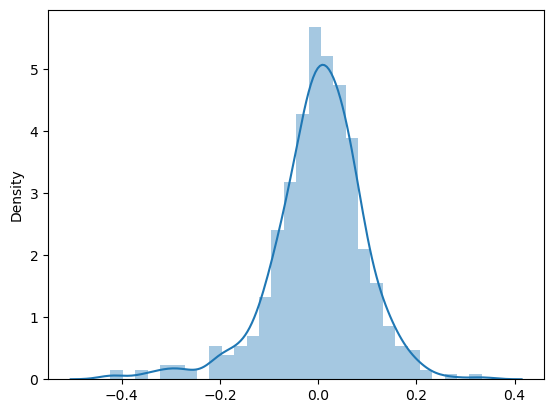

In [324]:
res = y_train - y_train_pred
sns.distplot(res)

## Predictions and evaluation on the test set

In [326]:
bike_df_num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_df_test[bike_df_num_vars] = scaler.transform(bike_df_test[bike_df_num_vars])
bike_df_test.head()

,yr,mnth,weekday,temp,atemp,hum,windspeed,spring,summer,winter,Mist/Cloudy,Snow/Rain,cnt
184,0,7,1,0.831783,0.769660,0.657364,0.084219,0,0,0,1,0,0.692706
535,1,6,3,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,0.712034
299,0,10,4,0.511964,0.496145,0.837699,0.334206,0,0,1,1,0,0.303382
221,0,8,3,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0,0.547400
152,0,6,4,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,0.569029


In [329]:
y_test = bike_df_test['cnt']

X_test = bike_df_test[['yr','mnth','weekday','temp', 'atemp', 'hum', 'windspeed','spring', 'summer', 'winter', 'Mist/Cloudy','Snow/Rain']]

In [330]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()
# lr = sm.OLS(y_train,X_train_sm)
# lr_model = lr.fit()
# lr_model.params
# X_test = bike_df_test

,const,yr,mnth,weekday,temp,atemp,hum,windspeed,spring,summer,winter,Mist/Cloudy,Snow/Rain
184,1.0,0,7,1,0.831783,0.769660,0.657364,0.084219,0,0,0,1,0
535,1.0,1,6,3,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0
299,1.0,0,10,4,0.511964,0.496145,0.837699,0.334206,0,0,1,1,0
221,1.0,0,8,3,0.881625,0.795343,0.437098,0.339570,0,0,0,0,0
152,1.0,0,6,4,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0


In [331]:
# dropping atemp,mnth,hum variables from X_test
X_test_sm = X_test_sm.drop(['atemp','mnth','hum'],axis=1)

In [333]:
# predict
y_test_pred = lr_model.predict(X_test_sm)

In [334]:
# evaluate
r2_score(y_true=y_test,y_pred = y_test_pred)

0.8026296463146897

In [335]:
# R-squared for test data is around 80%

equation for best fitted line is 

cnt = <italics>yr * 0.2359 + weekday * 0.0092 + temp * 0.4693 + windspeed * -0.1584 + spring * -0.0828 + summer * 0.0413 + winter * 0.0757 + Mist/Cloudy * -0.0756 + Snow/Rain * -0.2782	</italics>

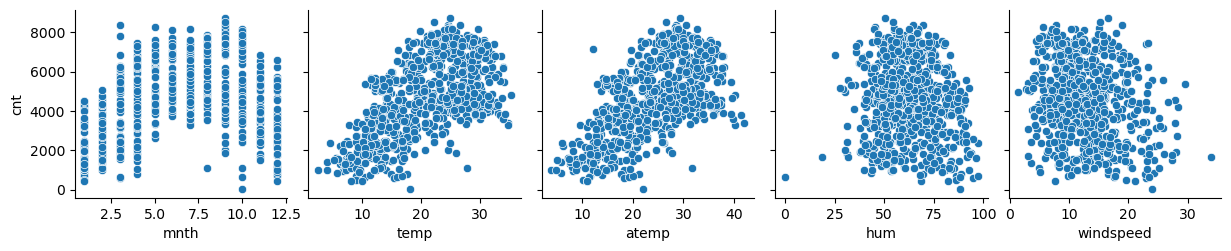

In [337]:
bike_df_num_vars = ['mnth','temp','atemp','hum','windspeed']
sns.pairplot(data=bike_df,x_vars=bike_df_num_vars,y_vars='cnt')

In [ ]:
resi = y_train - y_train_pred
resi